<a href="https://colab.research.google.com/github/Doanlien/data/blob/master/RFM_Finhay_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# xlrd is needed to load excel files
!pip install xlrd
!pip install psycopg2

In [ ]:
import pandas as pd

In [ ]:
import io
from io import StringIO
import string
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df = pd.read_excel('Data.xlsx')

In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit
1,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw
2,s4610567,c1ae38b7-4e43-4438-80e7-12afb8602984,2022-01-31 14:59:14,39250.000000,CD0,Deposit
3,cd3m870501,8da94674-aa2c-4a6e-bb96-09a938836b58,2022-01-27 07:06:43,606.299413,CD3M,Withdraw
4,cd3m814978,ae793a52-8e9d-4e84-be11-e686eb7d7edc,2022-01-04 16:37:42,883.125000,CD3M,Withdraw


In [ ]:
df.isna()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
60135,False,False,False,False,False,False
60136,False,False,False,False,False,False
60137,False,False,False,False,False,False
60138,False,False,False,False,False,False


In [ ]:
df.isnull()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
60135,False,False,False,False,False,False
60136,False,False,False,False,False,False
60137,False,False,False,False,False,False
60138,False,False,False,False,False,False


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,paid_amount
count,60080.000000
mean,1233.177750
std,9505.170106
min,0.000196
25%,19.625000
50%,98.125000
75%,392.500000
max,981250.000000


In [ ]:
df.isnull()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
60135,False,False,False,False,False,False
60136,False,False,False,False,False,False
60137,False,False,False,False,False,False
60138,False,False,False,False,False,False


In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit
1,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw
2,s4610567,c1ae38b7-4e43-4438-80e7-12afb8602984,2022-01-31 14:59:14,39250.000000,CD0,Deposit
3,cd3m870501,8da94674-aa2c-4a6e-bb96-09a938836b58,2022-01-27 07:06:43,606.299413,CD3M,Withdraw
4,cd3m814978,ae793a52-8e9d-4e84-be11-e686eb7d7edc,2022-01-04 16:37:42,883.125000,CD3M,Withdraw


In [ ]:
from datetime import datetime

In [ ]:
# 1 Calculate Recency
# 1.1 Find the most recent Transaction
dfRecentTransaction = pd.pivot_table(data = df,
                                index = ['user_id'],
                                values = ['created_at'],
                                aggfunc = {'created_at':max}
                                ) 

In [ ]:
#dfRecentOrder.columns = ['RecentOrderDate']
dfRecentTransaction.columns = ['RecentTransaction']

In [ ]:
dfRecentTransaction.head()

,RecentTransaction
user_id,
00026900-b704-48c9-960e-54013f3a745b,2022-01-08 14:01:28
00053828-77b6-4047-a5fa-7fefee3ddebe,2022-02-11 18:18:20
0006c7b6-a253-4ab1-995b-6a45d3b7ac18,2022-02-25 10:24:34
0009e738-9879-4ed5-aed3-f4c23345812e,2022-03-08 07:41:38
000c8c95-b092-4088-a88b-00161ff4521b,2022-02-11 16:05:00


In [ ]:
#df = pd.merge(df, dfRecentOrder.reset_index(), on = ['CustomerID'])
df = pd.merge(df, dfRecentTransaction.reset_index(), on = ['user_id'])

In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des,dfRecentTransaction,RecentTransaction
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39
1,i8386811,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-28 12:16:58,20.480055,Cò Trắng,Withdraw,2022-04-01 02:20:39,2022-04-01 02:20:39
2,s5542832,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-18 21:19:41,235.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39
3,s4806244,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-02-06 18:51:42,981.250000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39
4,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw,2022-03-21 10:17:47,2022-03-21 10:17:47


In [ ]:
print(df['RecentTransaction'])

0       2022-04-01 02:20:39
1       2022-04-01 02:20:39
2       2022-04-01 02:20:39
3       2022-04-01 02:20:39
4       2022-03-21 10:17:47
                ...        
60075   2022-02-06 15:27:48
60076   2022-02-06 21:11:49
60077   2022-02-27 19:14:38
60078   2022-02-07 19:53:46
60079   2022-02-23 13:17:23
Name: RecentTransaction, Length: 60080, dtype: datetime64[ns]


In [ ]:
#df['RecentOrderDate'] = df['RecentOrderDate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['RecentTransaction'] = df['RecentTransaction'].apply(lambda x: datetime.strptime(x,'%y-%m-%d %H:%M:%S'))

TypeError: ignored

In [ ]:
#df['Recency'] = df['RecentOrderDate'].apply(lambda x: (datetime.now() - x).days)
df['Recency'] = df['RecentTransaction'].apply(lambda x: (datetime.now() - x).days)

In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des,dfRecentTransaction,RecentTransaction,Recency
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,20
1,i8386811,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-28 12:16:58,20.480055,Cò Trắng,Withdraw,2022-04-01 02:20:39,2022-04-01 02:20:39,20
2,s5542832,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-18 21:19:41,235.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,20
3,s4806244,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-02-06 18:51:42,981.250000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,20
4,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw,2022-03-21 10:17:47,2022-03-21 10:17:47,30


In [ ]:
# Đổi dấu recency
df['Recency'] = - df['Recency']

In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des,dfRecentTransaction,RecentTransaction,Recency
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20
1,i8386811,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-28 12:16:58,20.480055,Cò Trắng,Withdraw,2022-04-01 02:20:39,2022-04-01 02:20:39,-20
2,s5542832,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-18 21:19:41,235.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20
3,s4806244,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-02-06 18:51:42,981.250000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20
4,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw,2022-03-21 10:17:47,2022-03-21 10:17:47,-30


In [ ]:
# 2. Calculate Frequency
dfFrequency = df.groupby('user_id').transaction_id.nunique().to_frame()
dfFrequency.columns = ['Frequency']
df = pd.merge(df, dfFrequency.reset_index(), on = 'user_id')


In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des,dfRecentTransaction,RecentTransaction,Recency,Frequency
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4
1,i8386811,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-28 12:16:58,20.480055,Cò Trắng,Withdraw,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4
2,s5542832,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-18 21:19:41,235.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4
3,s4806244,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-02-06 18:51:42,981.250000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4
4,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw,2022-03-21 10:17:47,2022-03-21 10:17:47,-30,4


In [ ]:
# 3. Calculate Monetary
dfMonetary = df.groupby('user_id').paid_amount.sum().to_frame()
dfMonetary.columns = ['Monetary']
df = pd.merge(df, dfMonetary.reset_index(), on = 'user_id')

In [ ]:
dfMonetary.head()
dfMonetary.sort_values('Monetary')

,Monetary
user_id,
a5d65095-80fa-478a-89e8-d5798e1b08f2,9.812500e-03
391d6b4c-f792-4509-8c07-74531e943beb,9.812500e-03
46b2abc8-28a4-491e-8f91-6cc31a38d48e,9.812500e-03
7c9db4c4-4693-45ee-bd20-c29c63815052,9.812500e-03
4caedba0-47f1-42c4-bafc-6050dfe70531,1.962500e-02
...,...
fceb7bdb-a0d8-4cde-a861-1dc8ab4fc979,6.855427e+05
d79f4285-a2ca-434d-935d-d3e1711cea0e,8.845767e+05
ea798aa3-2328-4c2a-b570-1268ff961d58,9.214612e+05


In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des,dfRecentTransaction,RecentTransaction,Recency,Frequency,Monetary
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055
1,i8386811,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-28 12:16:58,20.480055,Cò Trắng,Withdraw,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055
2,s5542832,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-18 21:19:41,235.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055
3,s4806244,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-02-06 18:51:42,981.250000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055
4,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw,2022-03-21 10:17:47,2022-03-21 10:17:47,-30,4,116.768750


In [ ]:
orderFrequencies = df['Frequency'].rank(method='first')
df['rFrequency'] = pd.qcut(orderFrequencies, 10, labels = False)
df[['rRecency', 'rMonetary']] = df[['Recency', 'Monetary']].apply(lambda x: pd.qcut(x, 10, labels = False))
df['rank'] = (df['rFrequency'] + df['rRecency'] + df['rMonetary'])/3
df['FinalRank'] = df['rank'].apply(int)

In [ ]:
df.head()

,transaction_id,user_id,created_at,paid_amount,product_name,transaction_type_des,dfRecentTransaction,RecentTransaction,Recency,Frequency,Monetary,rFrequency,rRecency,rMonetary,rank,FinalRank
0,s5747513,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-04-01 02:20:39,1177.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055,8,9,8,8.333333,8
1,i8386811,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-28 12:16:58,20.480055,Cò Trắng,Withdraw,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055,8,9,8,8.333333,8
2,s5542832,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-03-18 21:19:41,235.500000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055,8,9,8,8.333333,8
3,s4806244,a17c1dc8-cb55-40cc-ba3f-f04c0d47cc5c,2022-02-06 18:51:42,981.250000,CD0,Deposit,2022-04-01 02:20:39,2022-04-01 02:20:39,-20,4,2414.730055,8,9,8,8.333333,8
4,s4596015,237bd3ef-d591-4047-8e72-023b0c04ab47,2022-01-28 18:31:54,27.475000,CD0,Withdraw,2022-03-21 10:17:47,2022-03-21 10:17:47,-30,4,116.768750,8,7,4,6.333333,6


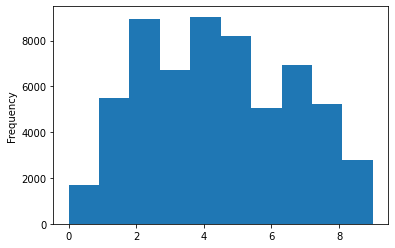

In [ ]:
import matplotlib.pyplot as plt

df['rank'].plot.hist(bins = 10)
plt.show()

In [ ]:
# help(pd.qcut)
# df['rank'].min()

df['Segment'] = 'Low'
df.loc[(df['rank'] < 7) & (df['rank'] >= 4), 'Segment'] = 'Normal'
df.loc[df['rank'] >= 7, 'Segment'] = 'VIP'

Text(0.5, 1.0, 'Tỷ lệ số lượng khách hàng theo segment KH')

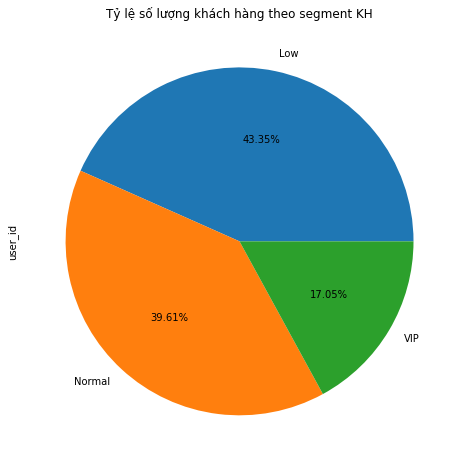

In [ ]:
df.groupby('Segment').user_id.count().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ số lượng khách hàng theo segment KH')

Text(0.5, 1.0, 'Tỷ lệ doanh số theo segment KH')

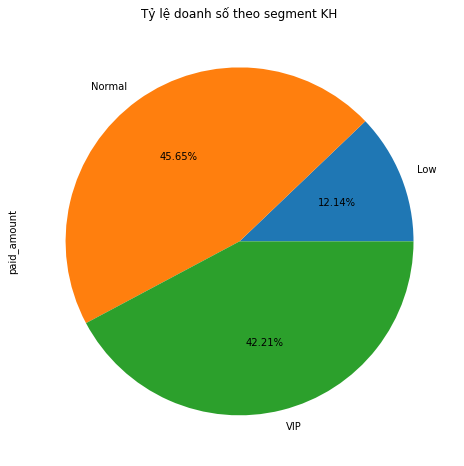

In [ ]:
df.groupby('Segment').paid_amount.sum().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ doanh số theo segment KH')

Text(0.5, 1.0, 'Doanh số theo segment KH')

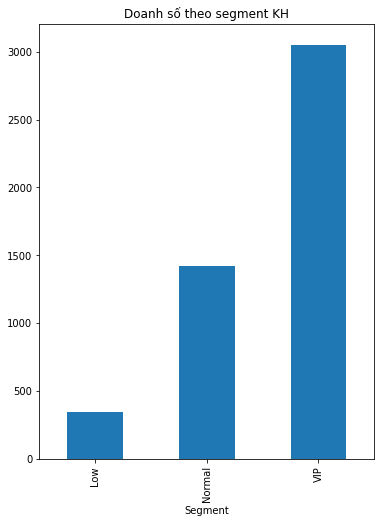

In [ ]:
df.groupby('Segment').paid_amount.mean().plot.bar(figsize = (6, 8))
plt.title('Doanh số theo segment KH')

Text(0.5, 1.0, 'Số ngày mua hàng gần nhất theo segment KH')

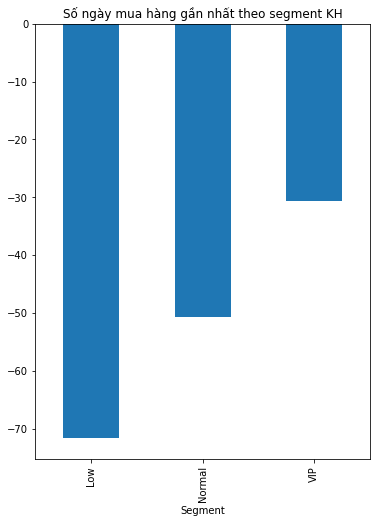

In [ ]:
df.groupby('Segment').Recency.mean().plot.bar(figsize = (6, 8))
plt.title('Số ngày mua hàng gần nhất theo segment KH')